<a href="https://colab.research.google.com/github/AkashssA/Ai_Lab/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [4]:
X = df_encoded.drop('charges', axis=1)  # Features
y = df_encoded['charges']              # Target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.7835929767120724
Mean Squared Error: 33596915.85136145


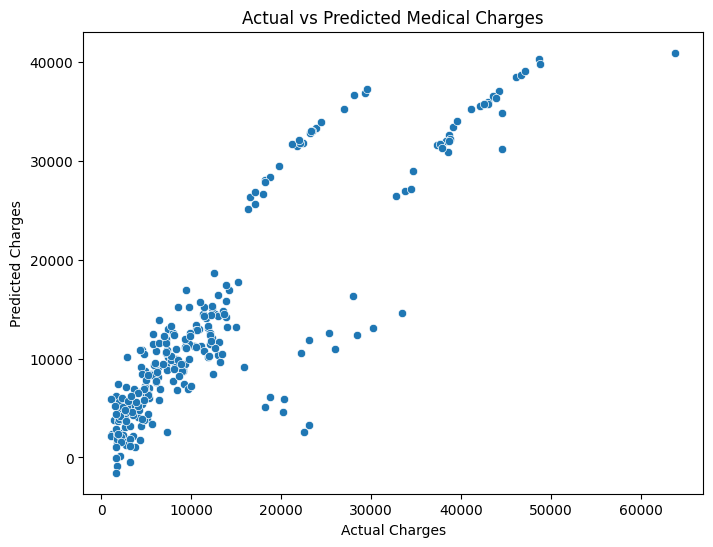

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()


In [9]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


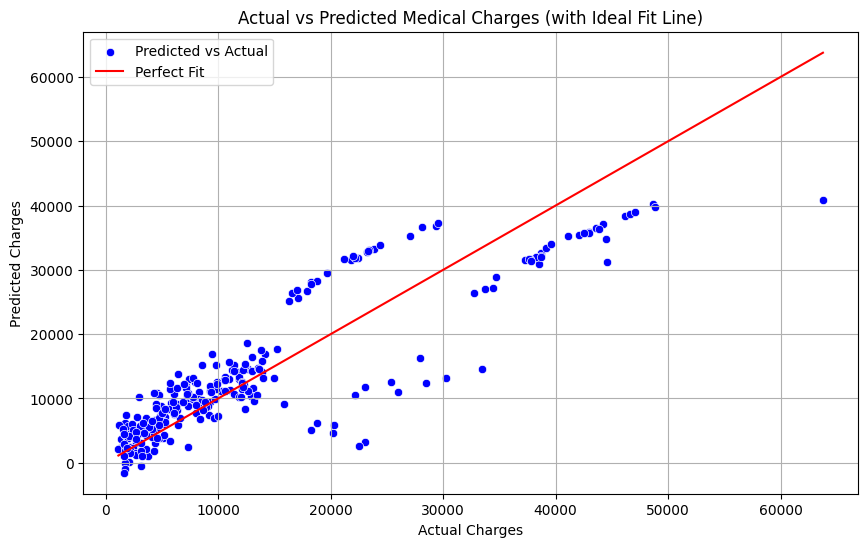

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of actual vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted vs Actual', color='blue')

# Add a line plot to show the ideal trend line (perfect prediction line)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges (with Ideal Fit Line)')
plt.legend()
plt.grid(True)
plt.show()
